# Enron Project

In [1]:
# '#'D OUT IMPORTS WERE USED AT SOME POINT IN PLAYING/PRODUCTION, CAH

import sys
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot
import tester
sys.path.append("../tools/")

#REMOVE PYTHON 2.7 WANRINGS, CAH
import warnings 
warnings.filterwarnings('ignore')

from time import time
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, cross_val_score
from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data
from collections import defaultdict

# Task 1: Select what features you'll use.

In [2]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

# FEATURES USED, CAH
label = 'poi'

fin_features = [
    'bonus',
    'deferral_payments',
    'deferred_income',
    'director_fees',
    'exercised_stock_options',
    'expenses',
    'loan_advances',
    'long_term_incentive',
    'other',
    'restricted_stock',
    'restricted_stock_deferred',
    'salary',
    'total_payments',
    'total_stock_value',]

em_features = [
    'from_messages',
    'from_poi_to_this_person',
    'from_this_person_to_poi',
    'shared_receipt_with_poi',
    'to_messages',]

features_list = [label] + fin_features + em_features 

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

# Task 2: Remove outliers

### Investigating ouliers

In [3]:
# NUMBER OF OBJECTS IN DATASET, CAH
print('There are {} objects in the dataset.'.format(len(data_dict)))

There are 146 objects in the dataset.


In [4]:
# POI VS. NON-POI, CAH
poi_counts = defaultdict(int)
for features_val in data_dict.values():
    poi_counts[features_val['poi']] += 1
print('There are {} POIs and {} non-POIs.'.format(poi_counts[True], poi_counts[False]))

There are 18 POIs and 128 non-POIs.


In [5]:
# NUMBER OF FEATURES USED AND NAMES, CAH
print('There are {} features.'.format(len(list(data_dict.values())[0])))
list(list(data_dict.values())[0].keys())

There are 21 features.


['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'email_address',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'from_poi_to_this_person',
 'exercised_stock_options',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'long_term_incentive',
 'shared_receipt_with_poi',
 'restricted_stock',
 'director_fees']

In [6]:
# NAMES IN SET, CAH
print(data_dict.keys())
# list(data_dict.keys()) # USED FOR EASIER VIEWING, CAH

dict_keys(['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HAEDICKE MARK E', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'NOLES JAMES L', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY REX', 'LEMA

In [7]:
# ALL 'NAN' IN MAIN FEATURES, I KIND OF STUMBLED INTO THIS ONE WHILE LEARNING, COULD NOT ITERATE, CAH
for entry in data_dict:
    if data_dict[entry]['director_fees'] == 'NaN' \
    and data_dict[entry]['total_stock_value'] == 'NaN' \
    and data_dict[entry]['total_payments'] == 'NaN':
        print(entry)

LOCKHART EUGENE E


In [8]:
# CHECK LOCKHART INFO, CAH
data_dict['LOCKHART EUGENE E']

{'salary': 'NaN',
 'to_messages': 'NaN',
 'deferral_payments': 'NaN',
 'total_payments': 'NaN',
 'loan_advances': 'NaN',
 'bonus': 'NaN',
 'email_address': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 'NaN',
 'expenses': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 'NaN',
 'from_messages': 'NaN',
 'other': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 'NaN',
 'director_fees': 'NaN'}

In [9]:
# CHECK TOTAL INFO, CAH
data_dict['TOTAL']

{'salary': 26704229,
 'to_messages': 'NaN',
 'deferral_payments': 32083396,
 'total_payments': 309886585,
 'loan_advances': 83925000,
 'bonus': 97343619,
 'email_address': 'NaN',
 'restricted_stock_deferred': -7576788,
 'deferred_income': -27992891,
 'total_stock_value': 434509511,
 'expenses': 5235198,
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 311764000,
 'from_messages': 'NaN',
 'other': 42667589,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 48521928,
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 130322299,
 'director_fees': 1398517}

In [10]:
# CHECK THE TRAVEL AGENCY IN THE PARK INFO, CAH
data_dict['THE TRAVEL AGENCY IN THE PARK']

{'salary': 'NaN',
 'to_messages': 'NaN',
 'deferral_payments': 'NaN',
 'total_payments': 362096,
 'loan_advances': 'NaN',
 'bonus': 'NaN',
 'email_address': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 'NaN',
 'expenses': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 'NaN',
 'from_messages': 'NaN',
 'other': 362096,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 'NaN',
 'director_fees': 'NaN'}

### Removing outliers found thus far

"TOTAL", "THE TRAVEL AGENCY IN THE PARK", and "LOCKHART EUGENE" are dropped for having no useful input. "TOTAL", appears to be the total of all summable features.. "THE TRAVEL AGENCY IN THE PARK", has incomplete data, and "LOCKHART" has no data.

In [11]:
### Task 2: Remove outliers

# REMOVE OUTLIERS
data_dict.pop('TOTAL',0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK',0)
data_dict.pop('LOCKHART EUGENE E',0)

{'salary': 'NaN',
 'to_messages': 'NaN',
 'deferral_payments': 'NaN',
 'total_payments': 'NaN',
 'loan_advances': 'NaN',
 'bonus': 'NaN',
 'email_address': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 'NaN',
 'expenses': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 'NaN',
 'from_messages': 'NaN',
 'other': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 'NaN',
 'director_fees': 'NaN'}

As this is an investigation into fraud, I do not want to be too aggresive in removing outliers. Even though this chart may appear to have several possible outliers remaining, these could represent more possible fraud and are not outside of the realm of possible theft considering the scenario.

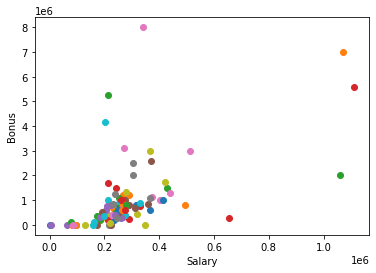

In [12]:
# CHART OUT BONUS AND SALARY FOR POTENTIAL OUTLIERS, CAH
# CODE PULLED FROM UDACITY, \OUTLIERS, CAH
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("Salary")
matplotlib.pyplot.ylabel("Bonus")
matplotlib.pyplot.show()

In [13]:
# TABLE OUT NAN IN POI & NON POI, CAH
nan_cnts_poi = defaultdict(int)
nan_cnts_non_poi = defaultdict(int)
for data_point in data_dict.values():
    if data_point['poi'] == True:
        for feature, value in data_point.items():
            if value == "NaN":
                nan_cnts_poi[feature] += 1
    elif data_point['poi'] == False:
        for feature, value in data_point.items():
            if value == "NaN":
                nan_cnts_non_poi[feature] += 1
    else:
        print('Uknown person.')
nan_cnts_df = pd.DataFrame([nan_cnts_poi, nan_cnts_non_poi]).T
nan_cnts_df = nan_cnts_df.fillna(value=0)
nan_cnts_df.columns = ['# NaN in POIs', '# NaN in non-POIs']
nan_cnts_df['# NaN total'] = nan_cnts_df['# NaN in POIs'] + \
                               nan_cnts_df['# NaN in non-POIs']
nan_cnts_df['% NaN total'] = nan_cnts_df['# NaN total'] / \
                                          len(data_dict) * 100
    
nan_cnts_df

,# NaN in POIs,# NaN in non-POIs,# NaN total,% NaN total
deferral_payments,13.0,92.0,105.0,73.426573
loan_advances,17.0,123.0,140.0,97.902098
restricted_stock_deferred,18.0,108.0,126.0,88.111888
director_fees,18.0,109.0,127.0,88.811189
exercised_stock_options,6.0,36.0,42.0,29.370629
long_term_incentive,6.0,72.0,78.0,54.545455
to_messages,4.0,53.0,57.0,39.860140
deferred_income,7.0,88.0,95.0,66.433566
from_poi_to_this_person,4.0,53.0,57.0,39.860140
from_messages,4.0,53.0,57.0,39.860140


# Task 3: Create new feature(s)

In [14]:
### Task 3: Create new feature(s)

# CREATE FEATURES, WITH MESSAGES TO_FROM POI AND ALL MESSAGES TO_FROM PERSON
# RETURN TO FRACTION MESSAGES TO_FROM PERSON THAT ARE TO_FROM POI
# 'fraction_from_poi', 'fraction_to_poi' ARE CREATED DURING THIS PROCESS, CAH

### Store to my_dataset for easy export below.
my_dataset = data_dict

def getFraction( poi_messages, all_messages ):
    
    fraction = 0.
    if poi_messages != 'NaN' and all_messages != 'NaN':
        fraction = float(poi_messages)/all_messages
    return fraction

for name in data_dict:

    var = data_dict[name]

    from_poi_to_this_person = var["from_poi_to_this_person"]
    to_messages = var["to_messages"]
    fraction_from_poi = getFraction(from_poi_to_this_person, to_messages)
    
    data_dict[name]["fraction_from_poi"] = fraction_from_poi
  
    from_this_person_to_poi = var["from_this_person_to_poi"]
    from_messages = var["from_messages"]
    fraction_to_poi = getFraction(from_this_person_to_poi, from_messages)

    data_dict[name]["fraction_to_poi"] = fraction_to_poi

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [15]:
# NUMBER OF FEATURES USED AND NAMES, CAH
print('There are {} features.'.format(len(list(data_dict.values())[0])))
list(list(data_dict.values())[0].keys())

There are 23 features.


['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'email_address',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'from_poi_to_this_person',
 'exercised_stock_options',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'long_term_incentive',
 'shared_receipt_with_poi',
 'restricted_stock',
 'director_fees',
 'fraction_from_poi',
 'fraction_to_poi']

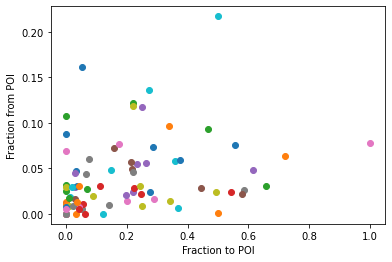

In [16]:
# CHART NEW FEATS, CAH
features_chart = ["fraction_to_poi", "fraction_from_poi", "poi"]
data_chart = featureFormat(data_dict, features_chart)

for point in data_chart:
    fraction_to_poi = point[0]
    fraction_from_poi = point[1]
    matplotlib.pyplot.scatter(fraction_to_poi, fraction_from_poi)
    

matplotlib.pyplot.xlabel("Fraction to POI")
matplotlib.pyplot.ylabel("Fraction from POI")
matplotlib.pyplot.show()

# Task 4: Try a varity of classifiers

In [17]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# SELECTKBEST, SHOW K TOP FEATS, CAH
selector = SelectKBest(k='all')
selectedFeatures = selector.fit(features, labels)
feature_names = [features_list[i+1] for i in selectedFeatures.get_support(indices=True)]
# scores = -np.log10(selector.pvalues_)
print('Best features in order: '), 
list(feature_names)#, (scores)

Best features in order: 


['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'total_payments',
 'total_stock_value',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'to_messages']

In [18]:
# SELECTKPERCENTILE, CUTTING FEATS IN HALF BY VALUE OF %, CAH
selector = SelectPercentile(f_classif, percentile = 50)
selectedFeatures = selector.fit(features, labels)
feature_names = [features_list[i+1] for i in selectedFeatures.get_support(indices=True)]
# scores = -np.log10(selector.pvalues_)
print('Best features in order: '), 
list(feature_names)#, (scores)

Best features in order: 


['bonus',
 'deferred_income',
 'exercised_stock_options',
 'long_term_incentive',
 'restricted_stock',
 'salary',
 'total_payments',
 'total_stock_value',
 'shared_receipt_with_poi']

In [19]:
# SPLIT DATA, TESTING AND TRAINING, CAH
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size = 0.3, 
                                                                            random_state = 42)

### LinearSVC

In [20]:
# LINEARSVC, CAH
t0 = time()
svc_clf = LinearSVC()
svc_clf.fit(features_train, labels_train).predict(features_test)
print ("training time:", round(time()-t0, 3), "s")
print ("-----------------------------------------")
print ("CLF Score:", svc_clf.score(features_test, labels_test))
print ("-----------------------------------------")
test_classifier(svc_clf, my_dataset, features_list)

training time: 0.003 s
-----------------------------------------
CLF Score: 0.6976744186046512
-----------------------------------------
LinearSVC()
	Accuracy: 0.73593	Precision: 0.20511	Recall: 0.34100	F1: 0.25615	F2: 0.30110
	Total predictions: 15000	True positives:  682	False positives: 2643	False negatives: 1318	True negatives: 10357



### GaussianNB

In [21]:
# GAUSSIANNB, CAH
t0 = time()
gnb_clf = GaussianNB()
gnb_clf.fit(features_train, labels_train).predict(features_test)
print ("training time:", round(time()-t0, 3), "s")
print ("-----------------------------------------")
print ("CLF Score:", gnb_clf.score(features_test, labels_test))
print ("-----------------------------------------")
test_classifier(gnb_clf, my_dataset, features_list)

training time: 0.002 s
-----------------------------------------
CLF Score: 0.8837209302325582
-----------------------------------------
GaussianNB()
	Accuracy: 0.73900	Precision: 0.22604	Recall: 0.39500	F1: 0.28753	F2: 0.34363
	Total predictions: 15000	True positives:  790	False positives: 2705	False negatives: 1210	True negatives: 10295



### DecisionTreeClassifier

In [22]:
# DECISIONTREECLASSIFIER, CAH
t0 = time()
dt_clf = DecisionTreeClassifier()
dt_clf.fit(features_train, labels_train).predict(features_test)
print ("training time:", round(time()-t0, 3), "s")
print ("-----------------------------------------")
print ("CLF Score:", dt_clf.score(features_test, labels_test))
print ("-----------------------------------------")
test_classifier(dt_clf, my_dataset, features_list)

training time: 0.002 s
-----------------------------------------
CLF Score: 0.813953488372093
-----------------------------------------
DecisionTreeClassifier()
	Accuracy: 0.79747	Precision: 0.23247	Recall: 0.22550	F1: 0.22893	F2: 0.22686
	Total predictions: 15000	True positives:  451	False positives: 1489	False negatives: 1549	True negatives: 11511



In [23]:
# DECISION TREE BEST FEATURES, CAH
important = dt_clf.feature_importances_
index = np.argsort(important)[::-1]
print('Best features in order: ')
for i in range(10):
    print ("{} feature {} ({})".format(i+1,features_list[i+1],important[index[i]]))

Best features in order: 
1 feature bonus (0.2037142857142859)
2 feature deferral_payments (0.196047619047619)
3 feature deferred_income (0.11309523809523812)
4 feature director_fees (0.11180451127819545)
5 feature exercised_stock_options (0.10714285714285715)
6 feature expenses (0.09145021645021652)
7 feature loan_advances (0.07047619047619036)
8 feature long_term_incentive (0.058650034176350056)
9 feature other (0.04761904761904762)
10 feature restricted_stock (0.0)


# Task 5: Tune your classifier to achieve better than .3 precision

I chose DecisionTreeClassifier to move forward with. Accuracy was highest for DecisionTree and Precision is in an exceptable starting area for reducing false positives with some tuning to achieve higher than .3 precision.

### Feature Selection
For feature selection I chose the features utilizing feature_importances_, selecting to use all features with a score higher than .05 (8 features) for GridSearchCV analysis. I wanted to use no less than 3 features and kept the max at 8. While exploring with the final feature set, 4 features were the perfect number. 3 features would start to reduce precision while 5 or more features would decrease recall, this did vary based on the other parameters included but did not product the results needed.

I also experimented with which features specifically to include. Taking the top 4 features from SelectK Percentile, I was not able to achieve better than .3 recall. I used the top 4 as GridSearchCV suggested. Essentially, as a novice, I experimented with some of these variables and found that any more than 4 variables were not giving positive results. As some features were very heavy with NaN's, this could be expected. The following represents the best results currently achieved.

### Feature Scaling
Feature scaling is the process of assessing a more even "weighting" to features. Feature scaling was not used for this project as it was not necessary for the algorithms chosen.

In [24]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.htmlerated
### /sklearn.cross_validation.StratifiedShuffleSplit.html

# USING DECSIONTREECV()
# USING GRIDSEARCH TO DETERMINE OPTIMAL FEATS AND PARAMETERS, CAH
# WILL NOT SCALE DUE TO HAVING HIGH VALUES THAT ARE POI'S , CAH
t0 = time()
param_grid = {
        'min_samples_split': range(2,15),
        'max_depth': range(1,15),
        'max_features': range(3,8)
          }
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3)
clf.fit(features_train, labels_train)
print ("training time:", round(time()-t0, 3), "s")
print ("-----------------------------------------")
print ("Best parameters found by grid search:")
print (clf.best_params_)
print ("-----------------------------------------")
print ("Best estimators found by grid search:")
print (clf.best_estimator_)

training time: 2.852 s
-----------------------------------------
Best parameters found by grid search:
{'max_depth': 2, 'max_features': 3, 'min_samples_split': 13}
-----------------------------------------
Best estimators found by grid search:
DecisionTreeClassifier(max_depth=2, max_features=3, min_samples_split=13)


### train_test_split
For this project the data is limited and features are unbalanced. There are many more non POI's than POI's, for example. I used train_test_split using 30% of the data for the validation test with the test_size parameter. Shuffle means that the samples are shuffled before being split into train and test sets and random_state controls the shuffling applied to the data. This should create a user defined amount of shuffles and reuses the data randomly across shuffles. To validate this we use the test set to gaugle a realistic performance of the model. 

In [25]:
# FEATURES, CAH
# FEATURES CHOSEN BY USING THE TOP 4 FROM DEC TREE. I PLAYED WITH INPUT FROM GRIDSEARCH AND ADJUSTING FEATS
# BY HAND, RESET SOME VALUES FOR CHOSEN FEATS, CAH
label = 'poi'

# USING SPECIFIC TOP FEATURES FROM DECISION TREE, CAH
# THIS MAY BE HIGHLY BIAS'D, JUST A FEW FEATS, CAH
fin_features_final = [
    'bonus',
    'deferral_payments',
    'deferred_income',
    'director_fees']

features_list = [label] + fin_features_final

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# SPLIT DATA, TESTING AND TRAINING, CAH
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            shuffle = 100,
                                                                            test_size = 0.3, 
                                                                            random_state = 42)

# RUN DECISION TREE WITH CHOSEN FEATS AND TUNED SPECS FROM GRIDSEARCH
# THESE VALUES MAY NOT REPRPESENT WHAT IS ABOVE, BUT AFTER MANY RUNS THESE SEEM BEST, CAH
t0 = time()
clf = DecisionTreeClassifier(min_samples_split = 14,
                             min_samples_leaf = 1,
                             max_depth = 4,
                             max_features = 4)
clf.fit(features_train, labels_train).predict(features_test)
print ("training time:", round(time()-t0, 3), "s")
print ("-----------------------------------------")
print ("CLF Score:", clf.score(features_test, labels_test))
print ("-----------------------------------------")
test_classifier(clf, my_dataset, features_list)

training time: 0.002 s
-----------------------------------------
CLF Score: 0.8857142857142857
-----------------------------------------
DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_split=14)
	Accuracy: 0.84817	Precision: 0.57793	Recall: 0.33000	F1: 0.42011	F2: 0.36097
	Total predictions: 12000	True positives:  660	False positives:  482	False negatives: 1340	True negatives: 9518



# Task 6: Dump your classifier, dataset, and features_list

In [26]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

# Questions

### Discuss parameter tuning and its importance.  Response addresses what it means to perform parameter tuning and why it is important.

Parameter tuning allows for more optimization within the algorithms performance to answer the question to our POI problem. A few tools were shown for this purpose and I chose to use GridSearchCV. I ran it with specific parameters chosen and used the estimator function as well. This is important to help parse out features that will not provide functionable data to refine our test.

### At least two appropriate metrics are used to evaluate algorithm performance (e.g. precision and recall), and the student articulates what those metrics measure in context of the project task.

Accuracy is a measure of the percentage of correctly identified POI/nonPOI's. This is a good metric for confidence but the classifier should not be judged on this alone as Accuracy does not tell the whole story and is a very general way of looking at classifier judgement.

Precision is a measure of the percentage of predicted POI's. This should create a high precision and low false positive rate. Precision creates confidence in the POI's that are marked as true positives.

Recall is a measure of the percentage of real POI's. This should create a high recall and low false negative rate. This metric shows confidence in recovering more POI's from nonPOI's.

F1 score gives a balanced mean of precision and recall.

### Discuss validation and its importance. Response addresses what validation is and why it is important.

With validation we test our model indpendent of the training data to estimate the overall performance of our model. Validation is a required step to give confidence to our model and the outcomes. Overfitting is an example of a problem that can be found with proper validation.

# Conclusion / What I've learned.

I do not believe I can articulate how much I've learned in this course. I feel fortunate that my education is currently my full-time job. Taking this course in sporadic stints while working may have been very challenging for me. With that said, I acutally think I could employ this in a working enviornment! The scikit-learn site really lays this info out well and many videos on youtube will walk one through many applications of machine learning. 

As well, I feel like there is a better solution than DecisionTreeClassifier to root our fraud here. I tried the others listed and ran into several problems, especially with python 2.7. I say this becuase for all of my tweaking, I feel like my metrics just weren't getting as high as I think they should be. At least, not as high as I would want to see them if someone were actually being investigated by this research.